In [67]:
import random
import copy
import timeit
from tabulate import tabulate
import matplotlib.pyplot as plt

In [68]:
# partition the array and return the final index of the pivot
def divide(arr, l, r):
    pivot = arr[r] # choose the right most element as pivot
    i, j = l, r-1
    while i < j:
#        print(i,j,arr)
        while arr[i] <= pivot and i <= j:
            # iterate from left to right until an element > pivot is found
            i += 1
        while arr[j] > pivot and i < j:
            # iterate from right to left until an element <= pivot is found
            j -= 1
        if i<j:
            # swap elements so the element < pivot moves to the left of pivot and the larger one right
            arr[i], arr[j] = arr[j], arr[i]
    if arr[i] > arr[r]:
        # place pivot in between the left and right subarays
        arr[i], arr[r] = arr[r], arr[i]
#    print(f'end {i},{j},{arr}')
    return i

In [69]:
# quick sort
def qs(arr,l,r):
    if l >= r: return
    # divide array based on a pivot
    p = divide(arr,l,r)
    # quick sort the subarray left to the pivot (elements <= pivot)
    qs(arr,l,p-1)
    # quick sort the subarray right to the pivot (elements > pivot)
    qs(arr,p+1,r)

In [70]:
Value = 37
# All elements of the array are the sme
def qs_same_elements(size):
    arr = [Value] * size
    qs(arr, 0, size-1)

In [71]:
Min, Max_ratio = 0, 0.9

In [72]:
# Elements of the array are randomly generated
def qs_random_elements(size):
    arr = [random.randint(Min, int(Max_ratio * size)) for _ in range(size)]
#    arr_org = copy.deepcopy(arr)
    qs(arr, 0, size-1)
#    print(f'Test 2: {arr == sorted(arr_org)}\n {arr_org[:10]}\n {arr[:10]}')

In [73]:
# Elements of the array are randomly generated then reversely sorted
def qs_sorted_reverse(size):
    arr = [random.randint(Min, int(Max_ratio * size)) for _ in range(size)]
#    arr_org = copy.deepcopy(arr)
    arr.sort(reverse = True)
    qs(arr, 0, size-1)
#    print(f'Test 3: {arr == sorted(arr_org)}\n {arr_org[:10]}\n {arr[:10]}')

In [74]:
sizes = [10, 100, 500, 1000] # array size

In [75]:
iterations = 100
time_qs_same = {}
time_qs_random = {}
time_qs_reverse = {}

In [76]:
for size in sizes:
    # 1. All elements are the same
    time_qs_same[size] = round(timeit.timeit(lambda: qs_same_elements(size), number=iterations)*1000, 2)

    # 2. Random elements
    time_qs_random[size] = round(timeit.timeit(lambda: qs_random_elements(size), number=iterations)*1000, 2)
    
    # 3. elements sorted in reverse order
    time_qs_reverse[size] = round(timeit.timeit(lambda: qs_sorted_reverse(size), number=iterations)*1000, 2)

Quick Sort Execution Time in ms
List Element Pattern      10     100      500     1000
----------------------  ----  ------  -------  -------
same elements           1.47  105.86  1888.9   7521.12
random elements         3.49   44.45   263.4    510.73
sorted reverse          3.16   70.75  1484.26  5895.42




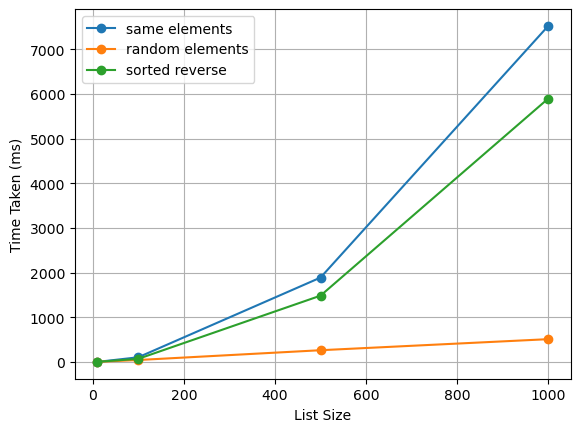

In [77]:
print('Quick Sort Execution Time in ms')
print(tabulate([['same elements']+[*time_qs_same.values()], ['random elements']+[*time_qs_random.values()], \
               ['sorted reverse']+[*time_qs_reverse.values()]], headers=['List Element Pattern']+[*time_qs_same]))
print('\n')
plt.plot([*time_qs_same], [*time_qs_same.values()], label='same elements', marker = 'o')
plt.plot([*time_qs_same], [*time_qs_random.values()], label='random elements', marker = 'o')
plt.plot([*time_qs_same], [*time_qs_reverse.values()], label='sorted reverse', marker = 'o')
plt.grid()
plt.legend(['same elements', 'random elements', 'sorted reverse'])
plt.xlabel('List Size')
plt.ylabel('Time Taken (ms)')
plt.show()